In [1]:
import numpy as np
import time

sc = SparkContext.getOrCreate()

In [2]:
df = spark.read.csv('playtennis.csv', header = True)
df

DataFrame[Outlook: string, Temperature: string, Humidity: string, Wind: string, PlayTennis: string]

In [3]:
type(df)

pyspark.sql.dataframe.DataFrame

In [4]:
from pyspark.sql import functions as F

df = df.withColumn('Outlook', F.when(F.col('Outlook')=='Sunny',0).otherwise(F.col('Outlook')))

In [5]:
df.show()

+--------+-----------+--------+------+----------+
| Outlook|Temperature|Humidity|  Wind|PlayTennis|
+--------+-----------+--------+------+----------+
|       0|        Hot|    High|  Weak|        No|
|       0|        Hot|    High|Strong|        No|
|Overcast|        Hot|    High|  Weak|       Yes|
|    Rain|       Mild|    High|  Weak|       Yes|
|    Rain|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Cool|  Normal|Strong|        No|
|Overcast|       Cool|  Normal|Strong|       Yes|
|       0|       Mild|    High|  Weak|        No|
|       0|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Mild|  Normal|  Weak|       Yes|
|       0|       Mild|  Normal|Strong|       Yes|
|Overcast|       Mild|    High|Strong|       Yes|
|Overcast|        Hot|  Normal|  Weak|       Yes|
|    Rain|       Mild|    High|Strong|        No|
+--------+-----------+--------+------+----------+



In [6]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel

df = spark.read.csv('playtennis.csv', header = True)

type(df)

pyspark.sql.dataframe.DataFrame

In [7]:
df.show()

+--------+-----------+--------+------+----------+
| Outlook|Temperature|Humidity|  Wind|PlayTennis|
+--------+-----------+--------+------+----------+
|   Sunny|        Hot|    High|  Weak|        No|
|   Sunny|        Hot|    High|Strong|        No|
|Overcast|        Hot|    High|  Weak|       Yes|
|    Rain|       Mild|    High|  Weak|       Yes|
|    Rain|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Cool|  Normal|Strong|        No|
|Overcast|       Cool|  Normal|Strong|       Yes|
|   Sunny|       Mild|    High|  Weak|        No|
|   Sunny|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Mild|  Normal|  Weak|       Yes|
|   Sunny|       Mild|  Normal|Strong|       Yes|
|Overcast|       Mild|    High|Strong|       Yes|
|Overcast|        Hot|  Normal|  Weak|       Yes|
|    Rain|       Mild|    High|Strong|        No|
+--------+-----------+--------+------+----------+



In [8]:
from pyspark.sql import functions as F

df = df.withColumn('Outlook', F.when(F.col('Outlook')=='Sunny', 0).otherwise(F.col('Outlook')))

In [9]:
df.show()

+--------+-----------+--------+------+----------+
| Outlook|Temperature|Humidity|  Wind|PlayTennis|
+--------+-----------+--------+------+----------+
|       0|        Hot|    High|  Weak|        No|
|       0|        Hot|    High|Strong|        No|
|Overcast|        Hot|    High|  Weak|       Yes|
|    Rain|       Mild|    High|  Weak|       Yes|
|    Rain|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Cool|  Normal|Strong|        No|
|Overcast|       Cool|  Normal|Strong|       Yes|
|       0|       Mild|    High|  Weak|        No|
|       0|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Mild|  Normal|  Weak|       Yes|
|       0|       Mild|  Normal|Strong|       Yes|
|Overcast|       Mild|    High|Strong|       Yes|
|Overcast|        Hot|  Normal|  Weak|       Yes|
|    Rain|       Mild|    High|Strong|        No|
+--------+-----------+--------+------+----------+



In [10]:
df = df.withColumn('Outlook', F.when(F.col('Outlook')=='Overcast',1).otherwise(F.col('Outlook')))

df.show()

+-------+-----------+--------+------+----------+
|Outlook|Temperature|Humidity|  Wind|PlayTennis|
+-------+-----------+--------+------+----------+
|      0|        Hot|    High|  Weak|        No|
|      0|        Hot|    High|Strong|        No|
|      1|        Hot|    High|  Weak|       Yes|
|   Rain|       Mild|    High|  Weak|       Yes|
|   Rain|       Cool|  Normal|  Weak|       Yes|
|   Rain|       Cool|  Normal|Strong|        No|
|      1|       Cool|  Normal|Strong|       Yes|
|      0|       Mild|    High|  Weak|        No|
|      0|       Cool|  Normal|  Weak|       Yes|
|   Rain|       Mild|  Normal|  Weak|       Yes|
|      0|       Mild|  Normal|Strong|       Yes|
|      1|       Mild|    High|Strong|       Yes|
|      1|        Hot|  Normal|  Weak|       Yes|
|   Rain|       Mild|    High|Strong|        No|
+-------+-----------+--------+------+----------+



In [11]:
df = df.withColumn('Outlook', F.when(F.col('Outlook')=='Rain',2).otherwise(F.col('Outlook')))

df.show()

+-------+-----------+--------+------+----------+
|Outlook|Temperature|Humidity|  Wind|PlayTennis|
+-------+-----------+--------+------+----------+
|      0|        Hot|    High|  Weak|        No|
|      0|        Hot|    High|Strong|        No|
|      1|        Hot|    High|  Weak|       Yes|
|      2|       Mild|    High|  Weak|       Yes|
|      2|       Cool|  Normal|  Weak|       Yes|
|      2|       Cool|  Normal|Strong|        No|
|      1|       Cool|  Normal|Strong|       Yes|
|      0|       Mild|    High|  Weak|        No|
|      0|       Cool|  Normal|  Weak|       Yes|
|      2|       Mild|  Normal|  Weak|       Yes|
|      0|       Mild|  Normal|Strong|       Yes|
|      1|       Mild|    High|Strong|       Yes|
|      1|        Hot|  Normal|  Weak|       Yes|
|      2|       Mild|    High|Strong|        No|
+-------+-----------+--------+------+----------+



In [12]:
df = df.withColumn('Temperature', F.when(F.col('Temperature')=='Hot', 0).otherwise(F.col('Temperature')))

df.show()

+-------+-----------+--------+------+----------+
|Outlook|Temperature|Humidity|  Wind|PlayTennis|
+-------+-----------+--------+------+----------+
|      0|          0|    High|  Weak|        No|
|      0|          0|    High|Strong|        No|
|      1|          0|    High|  Weak|       Yes|
|      2|       Mild|    High|  Weak|       Yes|
|      2|       Cool|  Normal|  Weak|       Yes|
|      2|       Cool|  Normal|Strong|        No|
|      1|       Cool|  Normal|Strong|       Yes|
|      0|       Mild|    High|  Weak|        No|
|      0|       Cool|  Normal|  Weak|       Yes|
|      2|       Mild|  Normal|  Weak|       Yes|
|      0|       Mild|  Normal|Strong|       Yes|
|      1|       Mild|    High|Strong|       Yes|
|      1|          0|  Normal|  Weak|       Yes|
|      2|       Mild|    High|Strong|        No|
+-------+-----------+--------+------+----------+



In [13]:
df = df.withColumn('Temperature', F.when(F.col('Temperature')=='Mild', 1).otherwise(F.col('Temperature')))

df.show()

+-------+-----------+--------+------+----------+
|Outlook|Temperature|Humidity|  Wind|PlayTennis|
+-------+-----------+--------+------+----------+
|      0|          0|    High|  Weak|        No|
|      0|          0|    High|Strong|        No|
|      1|          0|    High|  Weak|       Yes|
|      2|          1|    High|  Weak|       Yes|
|      2|       Cool|  Normal|  Weak|       Yes|
|      2|       Cool|  Normal|Strong|        No|
|      1|       Cool|  Normal|Strong|       Yes|
|      0|          1|    High|  Weak|        No|
|      0|       Cool|  Normal|  Weak|       Yes|
|      2|          1|  Normal|  Weak|       Yes|
|      0|          1|  Normal|Strong|       Yes|
|      1|          1|    High|Strong|       Yes|
|      1|          0|  Normal|  Weak|       Yes|
|      2|          1|    High|Strong|        No|
+-------+-----------+--------+------+----------+



In [14]:
df = df.withColumn('Temperature', F.when(F.col('Temperature')=='Cool', 2).otherwise(F.col('Temperature')))

df.show()

+-------+-----------+--------+------+----------+
|Outlook|Temperature|Humidity|  Wind|PlayTennis|
+-------+-----------+--------+------+----------+
|      0|          0|    High|  Weak|        No|
|      0|          0|    High|Strong|        No|
|      1|          0|    High|  Weak|       Yes|
|      2|          1|    High|  Weak|       Yes|
|      2|          2|  Normal|  Weak|       Yes|
|      2|          2|  Normal|Strong|        No|
|      1|          2|  Normal|Strong|       Yes|
|      0|          1|    High|  Weak|        No|
|      0|          2|  Normal|  Weak|       Yes|
|      2|          1|  Normal|  Weak|       Yes|
|      0|          1|  Normal|Strong|       Yes|
|      1|          1|    High|Strong|       Yes|
|      1|          0|  Normal|  Weak|       Yes|
|      2|          1|    High|Strong|        No|
+-------+-----------+--------+------+----------+



In [15]:
df = df.withColumn('Humidity', F.when(F.col('Humidity')=='High', 0).otherwise(F.col('Humidity')))

df.show()

+-------+-----------+--------+------+----------+
|Outlook|Temperature|Humidity|  Wind|PlayTennis|
+-------+-----------+--------+------+----------+
|      0|          0|       0|  Weak|        No|
|      0|          0|       0|Strong|        No|
|      1|          0|       0|  Weak|       Yes|
|      2|          1|       0|  Weak|       Yes|
|      2|          2|  Normal|  Weak|       Yes|
|      2|          2|  Normal|Strong|        No|
|      1|          2|  Normal|Strong|       Yes|
|      0|          1|       0|  Weak|        No|
|      0|          2|  Normal|  Weak|       Yes|
|      2|          1|  Normal|  Weak|       Yes|
|      0|          1|  Normal|Strong|       Yes|
|      1|          1|       0|Strong|       Yes|
|      1|          0|  Normal|  Weak|       Yes|
|      2|          1|       0|Strong|        No|
+-------+-----------+--------+------+----------+



In [16]:
df = df.withColumn('Humidity', F.when(F.col('Humidity')=='Normal', 1).otherwise(F.col('Humidity')))

df.show()

+-------+-----------+--------+------+----------+
|Outlook|Temperature|Humidity|  Wind|PlayTennis|
+-------+-----------+--------+------+----------+
|      0|          0|       0|  Weak|        No|
|      0|          0|       0|Strong|        No|
|      1|          0|       0|  Weak|       Yes|
|      2|          1|       0|  Weak|       Yes|
|      2|          2|       1|  Weak|       Yes|
|      2|          2|       1|Strong|        No|
|      1|          2|       1|Strong|       Yes|
|      0|          1|       0|  Weak|        No|
|      0|          2|       1|  Weak|       Yes|
|      2|          1|       1|  Weak|       Yes|
|      0|          1|       1|Strong|       Yes|
|      1|          1|       0|Strong|       Yes|
|      1|          0|       1|  Weak|       Yes|
|      2|          1|       0|Strong|        No|
+-------+-----------+--------+------+----------+



In [17]:
df = df.withColumn('Wind', F.when(F.col('Wind')=='Weak', 0).otherwise(F.col('Wind')))

df.show()

+-------+-----------+--------+------+----------+
|Outlook|Temperature|Humidity|  Wind|PlayTennis|
+-------+-----------+--------+------+----------+
|      0|          0|       0|     0|        No|
|      0|          0|       0|Strong|        No|
|      1|          0|       0|     0|       Yes|
|      2|          1|       0|     0|       Yes|
|      2|          2|       1|     0|       Yes|
|      2|          2|       1|Strong|        No|
|      1|          2|       1|Strong|       Yes|
|      0|          1|       0|     0|        No|
|      0|          2|       1|     0|       Yes|
|      2|          1|       1|     0|       Yes|
|      0|          1|       1|Strong|       Yes|
|      1|          1|       0|Strong|       Yes|
|      1|          0|       1|     0|       Yes|
|      2|          1|       0|Strong|        No|
+-------+-----------+--------+------+----------+



In [18]:
df = df.withColumn('Wind', F.when(F.col('Wind')=='Strong', 1).otherwise(F.col('Wind')))

df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      0|          0|       0|   0|        No|
|      0|          0|       0|   1|        No|
|      1|          0|       0|   0|       Yes|
|      2|          1|       0|   0|       Yes|
|      2|          2|       1|   0|       Yes|
|      2|          2|       1|   1|        No|
|      1|          2|       1|   1|       Yes|
|      0|          1|       0|   0|        No|
|      0|          2|       1|   0|       Yes|
|      2|          1|       1|   0|       Yes|
|      0|          1|       1|   1|       Yes|
|      1|          1|       0|   1|       Yes|
|      1|          0|       1|   0|       Yes|
|      2|          1|       0|   1|        No|
+-------+-----------+--------+----+----------+



In [19]:
df = df.withColumn('PlayTennis', F.when(F.col('PlayTennis')=='No', 0).otherwise(F.col('PlayTennis')))

df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      0|          0|       0|   0|         0|
|      0|          0|       0|   1|         0|
|      1|          0|       0|   0|       Yes|
|      2|          1|       0|   0|       Yes|
|      2|          2|       1|   0|       Yes|
|      2|          2|       1|   1|         0|
|      1|          2|       1|   1|       Yes|
|      0|          1|       0|   0|         0|
|      0|          2|       1|   0|       Yes|
|      2|          1|       1|   0|       Yes|
|      0|          1|       1|   1|       Yes|
|      1|          1|       0|   1|       Yes|
|      1|          0|       1|   0|       Yes|
|      2|          1|       0|   1|         0|
+-------+-----------+--------+----+----------+



In [20]:
df = df.withColumn('PlayTennis', F.when(F.col('PlayTennis')=='Yes', 1).otherwise(F.col('PlayTennis')))

df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      0|          0|       0|   0|         0|
|      0|          0|       0|   1|         0|
|      1|          0|       0|   0|         1|
|      2|          1|       0|   0|         1|
|      2|          2|       1|   0|         1|
|      2|          2|       1|   1|         0|
|      1|          2|       1|   1|         1|
|      0|          1|       0|   0|         0|
|      0|          2|       1|   0|         1|
|      2|          1|       1|   0|         1|
|      0|          1|       1|   1|         1|
|      1|          1|       0|   1|         1|
|      1|          0|       1|   0|         1|
|      2|          1|       0|   1|         0|
+-------+-----------+--------+----+----------+



In [21]:
df.schema

StructType(List(StructField(Outlook,StringType,true),StructField(Temperature,StringType,true),StructField(Humidity,StringType,true),StructField(Wind,StringType,true),StructField(PlayTennis,StringType,true)))

In [22]:
df = df.withColumn('Outlook', df['Outlook'].cast('int'))

df.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,StringType,true),StructField(Humidity,StringType,true),StructField(Wind,StringType,true),StructField(PlayTennis,StringType,true)))

In [23]:
df = df.withColumn('Temperature', df['Temperature'].cast('int'))

df.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,IntegerType,true),StructField(Humidity,StringType,true),StructField(Wind,StringType,true),StructField(PlayTennis,StringType,true)))

In [24]:
df = df.withColumn('Humidity', df['Humidity'].cast('int'))

df.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,IntegerType,true),StructField(Humidity,IntegerType,true),StructField(Wind,StringType,true),StructField(PlayTennis,StringType,true)))

In [25]:
df = df.withColumn('Wind', df['Wind'].cast('int'))

df.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,IntegerType,true),StructField(Humidity,IntegerType,true),StructField(Wind,IntegerType,true),StructField(PlayTennis,StringType,true)))

In [40]:
df = df.withColumn('PlayTennis', df['PlayTennis'].cast('int'))

df.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,IntegerType,true),StructField(Humidity,IntegerType,true),StructField(Wind,IntegerType,true),StructField(PlayTennis,IntegerType,true)))

In [43]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=['Outlook','Temperature','Humidity','Wind'], outputCol = 'features')

asembler_df = assembler.transform(df)

In [44]:
asembler_df.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          0|       0|   0|         0|        (4,[],[])|
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|
|      1|          0|       0|   0|         1|    (4,[0],[1.0])|
|      2|          1|       0|   0|         1|[2.0,1.0,0.0,0.0]|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|
|      2|          2|       1|   1|         0|[2.0,2.0,1.0,1.0]|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|
|      0|          1|       0|   0|         0|    (4,[1],[1.0])|
|      0|          2|       1|   0|         1|[0.0,2.0,1.0,0.0]|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|
|      0|          1|       1|   1|         1|[0.0,1.0,1.0,1.0]|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|
|      1|          0|    

In [45]:
(trainingData, testData) = asembler_df.randomSplit([0.7, 0.3])

trainingData.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          0|       0|   0|         0|        (4,[],[])|
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|
|      0|          1|       0|   0|         0|    (4,[1],[1.0])|
|      1|          0|       0|   0|         1|    (4,[0],[1.0])|
|      1|          0|       1|   0|         1|[1.0,0.0,1.0,0.0]|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|
|      2|          1|       0|   0|         1|[2.0,1.0,0.0,0.0]|
|      2|          1|       0|   1|         0|[2.0,1.0,0.0,1.0]|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|
+-------+-----------+--------+----+----------+-----------------+



In [46]:
testData.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          1|       1|   1|         1|[0.0,1.0,1.0,1.0]|
|      0|          2|       1|   0|         1|[0.0,2.0,1.0,0.0]|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|
|      2|          2|       1|   1|         0|[2.0,2.0,1.0,1.0]|
+-------+-----------+--------+----+----------+-----------------+



In [47]:
trainingData.schema

StructType(List(StructField(Outlook,IntegerType,true),StructField(Temperature,IntegerType,true),StructField(Humidity,IntegerType,true),StructField(Wind,IntegerType,true),StructField(PlayTennis,IntegerType,true),StructField(features,VectorUDT,true)))

In [48]:
from pyspark.ml.classification import DecisionTreeClassifier


dt = DecisionTreeClassifier(featuresCol = "features", labelCol = "PlayTennis")


dtModel = dt.fit(trainingData)

dtModel

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_0e0b6cf86a1b) of depth 3 with 7 nodes

In [49]:
prediction = dtModel.transform(testData)

prediction.show()

+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|rawPrediction|probability|prediction|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|      0|          1|       1|   1|         1|[0.0,1.0,1.0,1.0]|    [3.0,0.0]|  [1.0,0.0]|       0.0|
|      0|          2|       1|   0|         1|[0.0,2.0,1.0,0.0]|    [3.0,0.0]|  [1.0,0.0]|       0.0|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|    [0.0,1.0]|  [0.0,1.0]|       1.0|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|    [0.0,4.0]|  [0.0,1.0]|       1.0|
|      2|          2|       1|   1|         0|[2.0,2.0,1.0,1.0]|    [1.0,0.0]|  [1.0,0.0]|       0.0|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+



In [50]:
from dtreeviz import trees
from dtreeviz.models.spark_decision_tree import ShadowSparkTree

trainingData['Outlook','Temperature','Humidity','Wind'].show()

+-------+-----------+--------+----+
|Outlook|Temperature|Humidity|Wind|
+-------+-----------+--------+----+
|      0|          0|       0|   0|
|      0|          0|       0|   1|
|      0|          1|       0|   0|
|      1|          0|       0|   0|
|      1|          0|       1|   0|
|      1|          2|       1|   1|
|      2|          1|       0|   0|
|      2|          1|       0|   1|
|      2|          1|       1|   0|
+-------+-----------+--------+----+



In [51]:
trainingData[['PlayTennis']].show()

+----------+
|PlayTennis|
+----------+
|         0|
|         0|
|         0|
|         1|
|         1|
|         1|
|         1|
|         0|
|         1|
+----------+



In [52]:
print(dtModel.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_0e0b6cf86a1b) of depth 3 with 7 nodes
  If (feature 0 <= 0.5)
   Predict: 0.0
  Else (feature 0 > 0.5)
   If (feature 3 <= 0.5)
    Predict: 1.0
   Else (feature 3 > 0.5)
    If (feature 0 <= 1.5)
     Predict: 1.0
    Else (feature 0 > 1.5)
     Predict: 0.0



In [53]:
trainingData.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          0|       0|   0|         0|        (4,[],[])|
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|
|      0|          1|       0|   0|         0|    (4,[1],[1.0])|
|      1|          0|       0|   0|         1|    (4,[0],[1.0])|
|      1|          0|       1|   0|         1|[1.0,0.0,1.0,0.0]|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|
|      2|          1|       0|   0|         1|[2.0,1.0,0.0,0.0]|
|      2|          1|       0|   1|         0|[2.0,1.0,0.0,1.0]|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|
+-------+-----------+--------+----+----------+-----------------+



In [54]:
dataset = trainingData.toPandas()
dataset

,Outlook,Temperature,Humidity,Wind,PlayTennis,features
0,0,0,0,0,0,"(0.0, 0.0, 0.0, 0.0)"
1,0,0,0,1,0,"(0.0, 0.0, 0.0, 1.0)"
2,0,1,0,0,0,"(0.0, 1.0, 0.0, 0.0)"
3,1,0,0,0,1,"(1.0, 0.0, 0.0, 0.0)"
4,1,0,1,0,1,"[1.0, 0.0, 1.0, 0.0]"
5,1,2,1,1,1,"[1.0, 2.0, 1.0, 1.0]"
6,2,1,0,0,1,"[2.0, 1.0, 0.0, 0.0]"
7,2,1,0,1,0,"[2.0, 1.0, 0.0, 1.0]"
8,2,1,1,0,1,"[2.0, 1.0, 1.0, 0.0]"


In [55]:
dataset = dataset[['Outlook','Temperature','Humidity','Wind','PlayTennis']]
dataset

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,0,0,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,1,0,0,0,1
4,1,0,1,0,1
5,1,2,1,1,1
6,2,1,0,0,1
7,2,1,0,1,0
8,2,1,1,0,1


In [56]:
spark_dtree = ShadowSparkTree(
    dtModel,
    dataset[['Outlook','Temperature','Humidity','Wind']],
    dataset['PlayTennis'],
    feature_names = ['Outlook','Temperature','Humidity','Wind'],
    target_name = 'PlayTennis',
    class_names=['No','Yes']
)

spark_dtree

In [57]:
import os

os.environ['PATH']+= os.pathsep+'C:/Program Files/Graphviz/bin'
os.environ['PATH']

'C:\\Users\\Admin\\anaconda3\\envs\\spark_env;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\mingw-w64\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\usr\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Scripts;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\bin;C:\\Users\\Admin\\anaconda3\\condabin;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files\\Intel\\WiFi\\bin;C:\\Program Files\\Common Files\\Intel\\WirelessCommon;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files (x86)\\NVIDIA Corp

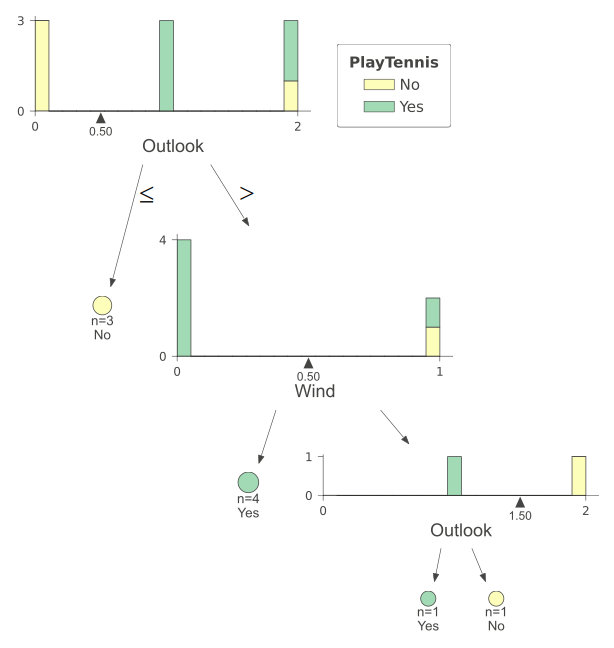

In [58]:
trees.dtreeviz(spark_dtree, scale=2.0)